<a href="https://colab.research.google.com/github/wozzin/AI_deeplearning/blob/main/abalon(make_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

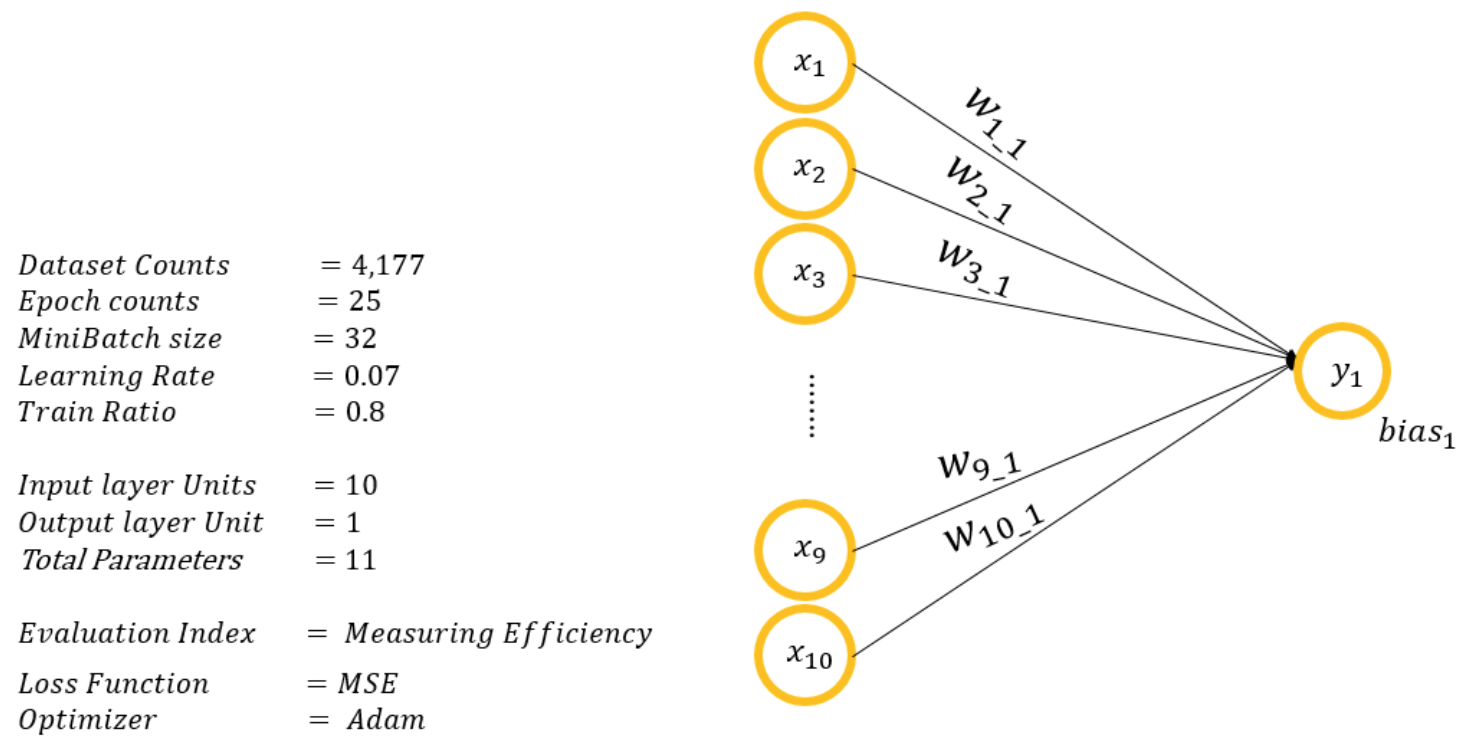

In [ ]:
# tensor 사용하지 않고 직접 신경망모델 생성 //

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep/abalone.csv')
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


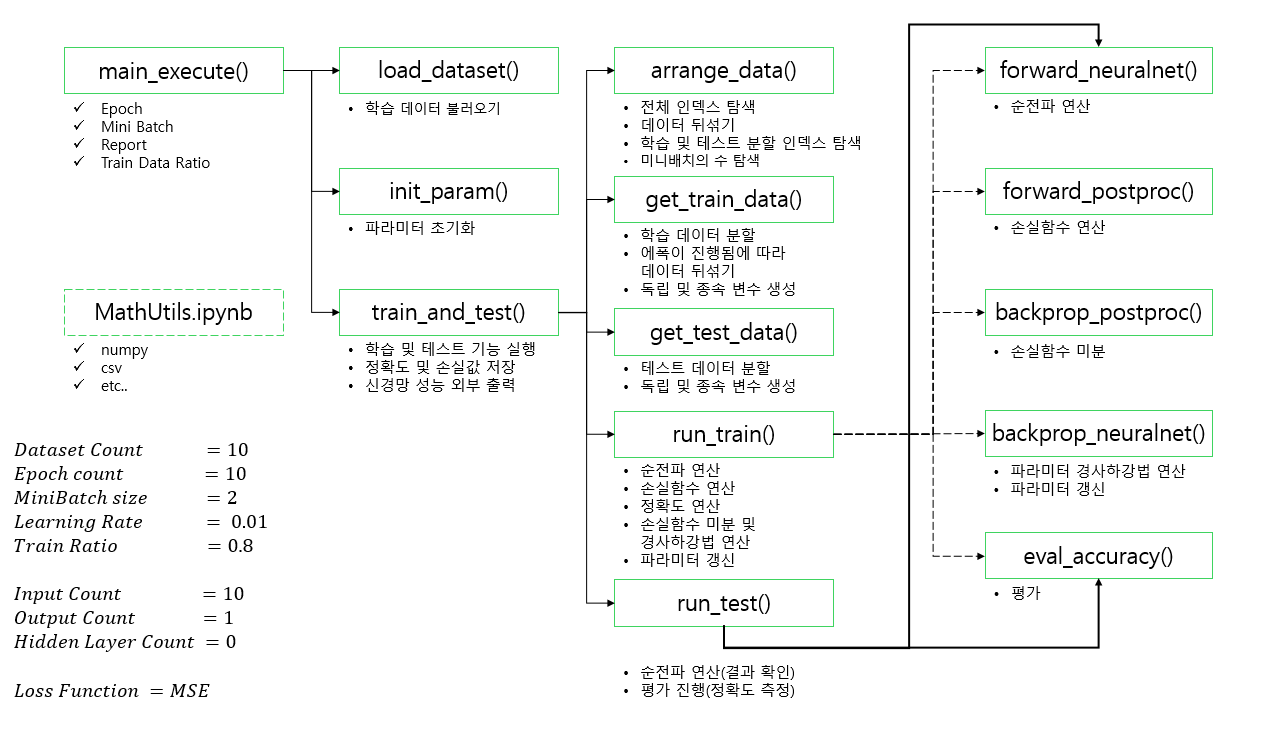

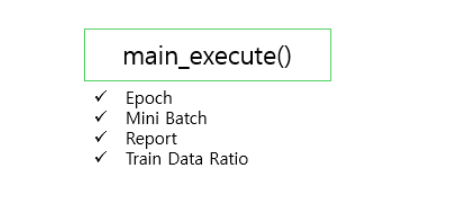

In [ ]:
# 메인함수 생성
def main_execute(epoch_count = 10, mb_size = 10, report = 2, train_ratio = 0.8):
  load_dataset()
  weight_initial , bias_initial = init_param()
  losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count, mb_size, report, train_ratio)
  return weight_initial , bias_initial , losses_mean_row, accs_mean_row, final_acc

In [ ]:
# one-hot vector 로 성별 데이터전처리 
def load_dataset():
  with open('/content/drive/MyDrive/Deep/abalone.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    rows = []
    for row in csvreader:
      rows.append(row)

  global data, input_cnt, output_cnt
  input_cnt, output_cnt = 10, 1
  data = np.zeros([len(rows), input_cnt + output_cnt])

  for n, row in enumerate(rows):
    if row[0] == 'M' : data[n,0] = 1
    if row[1] == 'F' : data[n,1] = 1
    if row[2] == 'I' : data[n,2] = 1
    data[n, 3: ] = row[1:]

In [ ]:
# MathUtils 불러오기 
%run /content/drive/MyDrive/Deep/MathUtils.ipynb

In [ ]:
load_dataset()

In [ ]:
print(data)

[[ 1.      0.      0.     ...  0.101   0.15   15.    ]
 [ 1.      0.      0.     ...  0.0485  0.07    7.    ]
 [ 0.      0.      0.     ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.      0.     ...  0.2875  0.308   9.    ]
 [ 0.      0.      0.     ...  0.261   0.296  10.    ]
 [ 1.      0.      0.     ...  0.3765  0.495  12.    ]]


In [ ]:
def init_param():
    global weight, bias 

    weight_initial = []
    bias_initial   = []
    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])
    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}".format(bias))
    weight_initial.append(weight)
    bias_initial.append(bias)

    return weight_initial, bias_initial

In [ ]:
weight_initial, bias_initial = init_param()

Initial Weight Value : 
[[ 0.02286351]
 [-0.00335917]
 [-0.03661917]
 [-0.00600852]
 [-0.01820016]
 [ 0.03227166]
 [ 0.02940192]
 [ 0.06187917]
 [-0.05398792]
 [-0.02859927]]
Initial Bias Value : 
[0.]


In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio):
  pass

In [ ]:
def arrange_data(mb_size, train_ratio):

  global shuffle_map, test_begin_index
  shuffle_map = np.arange(data.shape[0])
  np.random.shuffle(shuffle_map)

  mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size

  test_begin_index = mini_batch_step_count * mb_size

  return mini_batch_step_count

In [ ]:
mini_batch_step_count = arrange_data(mb_size = 2, train_ratio=0.8)
print("mini_batch_step_count :", mini_batch_step_count)
print("shuffle_map : ", shuffle_map[:3])
print("test_begin_index : ", test_begin_index)

mini_batch_step_count : 1670
shuffle_map :  [2211 3671 3538]
test_begin_index :  3340


In [ ]:
def get_test_data():
  test_data = data[shuffle_map[test_begin_index: ]]
  return test_data[ : , : -output_cnt], test_data[ : ,-output_cnt : ]

In [ ]:
test_x , test_y = get_test_data()
print(test_x)
print('=======' * 10)
print(test_y)

[[1.     0.     0.     ... 0.246  0.1005 0.1455]
 [1.     0.     0.     ... 0.326  0.2615 0.245 ]
 [0.     0.     0.     ... 0.695  0.296  0.444 ]
 ...
 [0.     0.     0.     ... 0.536  0.2115 0.1625]
 [0.     0.     0.     ... 0.167  0.08   0.125 ]
 [0.     0.     0.     ... 0.181  0.0695 0.079 ]]
[[ 8.]
 [ 9.]
 [11.]
 [ 8.]
 [17.]
 [11.]
 [10.]
 [ 7.]
 [11.]
 [10.]
 [18.]
 [11.]
 [ 8.]
 [ 6.]
 [ 8.]
 [ 9.]
 [12.]
 [ 3.]
 [12.]
 [ 8.]
 [11.]
 [ 5.]
 [10.]
 [10.]
 [ 8.]
 [ 9.]
 [ 6.]
 [13.]
 [ 7.]
 [ 7.]
 [ 8.]
 [10.]
 [18.]
 [10.]
 [ 8.]
 [11.]
 [ 8.]
 [13.]
 [14.]
 [14.]
 [10.]
 [ 9.]
 [ 9.]
 [11.]
 [10.]
 [ 6.]
 [ 5.]
 [ 9.]
 [ 9.]
 [ 9.]
 [13.]
 [12.]
 [ 8.]
 [ 7.]
 [ 9.]
 [ 9.]
 [10.]
 [ 7.]
 [10.]
 [ 8.]
 [ 5.]
 [16.]
 [12.]
 [ 6.]
 [ 9.]
 [14.]
 [ 6.]
 [ 6.]
 [10.]
 [10.]
 [13.]
 [12.]
 [21.]
 [12.]
 [14.]
 [10.]
 [10.]
 [ 9.]
 [ 7.]
 [ 8.]
 [ 8.]
 [ 8.]
 [ 9.]
 [10.]
 [12.]
 [ 6.]
 [12.]
 [14.]
 [ 8.]
 [10.]
 [10.]
 [ 8.]
 [ 8.]
 [ 9.]
 [ 4.]
 [16.]
 [12.]
 [11.]
 [11.]
 [11.]


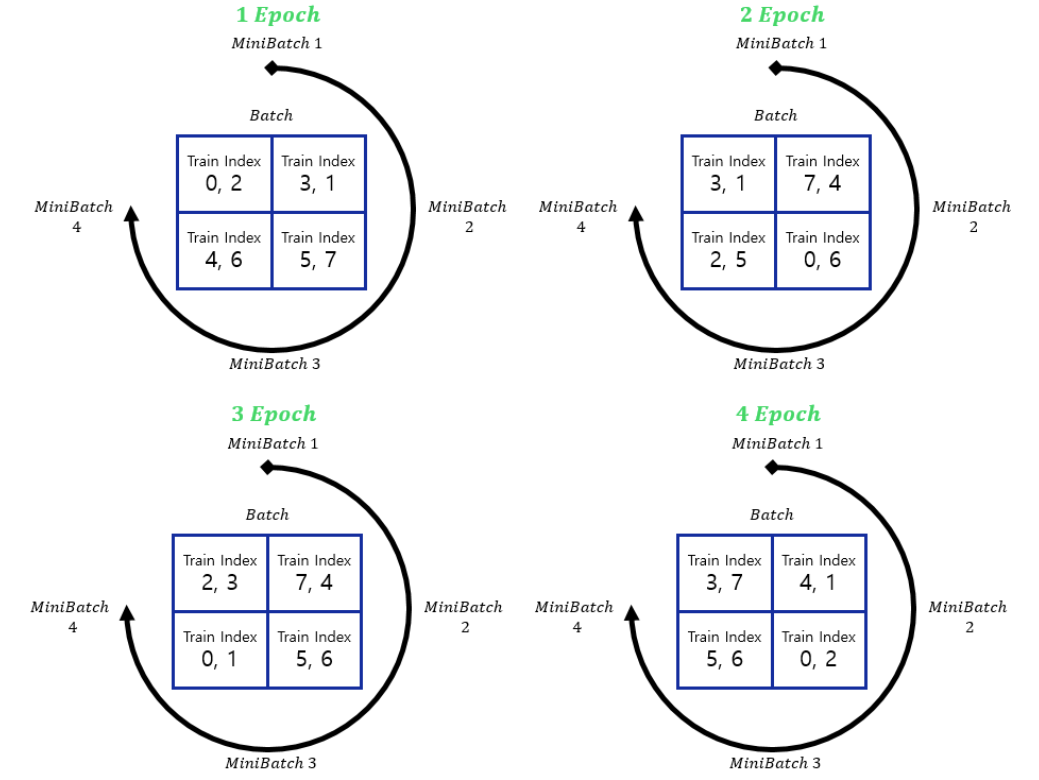

In [ ]:
# epoch 1번 돌떄마다 batch 안 index 값 랜덤으로 변경됨으로 train data shuffle 해주기

def get_train_data(mb_size, n):  # n = mini_batch_size 의 횟수
  if n == 0:
    np.random.shuffle(shuffle_map[:test_begin_index]) # train 데이터범위주고 shuffle 해주기

  train_data = data[shuffle_map[ mb_size * n : mb_size * (n + 1)]] # tf.keras ~ batchsize 안의 함수구현
  #mb_size * 0 : mb_size * (0+1) # 0 : 10 >> 해당 알고리즘 구현 
  #mb_size * 1 : mb_size * (1+1) # 10 : 20
  #mb_size * 2 : mb_size * (2+1) # 20 : 30

  return train_data[ :, :-output_cnt], train_data[ :, -output_cnt :]

In [ ]:
train_x, train_y = get_train_data(mb_size = 2, n = 1)
print(train_x)
print(train_y)

[[1.     0.     0.     0.435  0.335  0.11   0.4385 0.2075 0.0715 0.1315]
 [0.     0.     0.     0.69   0.54   0.195  1.2525 0.73   0.3975 0.462 ]]
[[ 7.]
 [12.]]


In [ ]:
def run_test(x, y): # 종속, 독립 변수필요하기때문에 x,y 파라미터 입력
  accuracy = 100
  return accuracy

In [ ]:
def run_train(x, y):
  loss = 0
  accuracy = 99.9
  return loss, accuracy

In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio):
  mini_batch_step_count = arrange_data(mb_size, train_ratio)
  test_x, test_y = get_test_data()

  losses_mean_row, accs_mean_row = [], [] 

  for epoch in range(epoch_count):
    losses = []
    accs = []
    for n in range(mini_batch_step_count):
      train_x, train_y = get_train_data(mb_size, n)
      loss, acc = run_train(train_x, train_y)
      losses.append(loss)
      accs.append(acc)

    if report > 0 and (epoch +1) % report == 0:
      acc = run_test(test_x, test_y)
      print("Epoch = {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Test - Accuracy = {:.3f} ".
            format(epoch+1, np.mean(losses), np.mean(accs), acc))
      
    losses_mean = np.mean(losses)
    accs_mean = np.mean(accs) * 100

    losses_mean_row.append(losses_mean)
    accs_mean_row.append(accs_mean)

  final_acc = run_test(test_x, test_y)
  print('=' * 30, "FINAL TEST", "=" * 30)
  print('\nFinal Accuracy = {:.3f}'.format(final_acc))

  return losses_mean_row, accs_mean_row, final_acc

In [ ]:


result = train_and_test(epoch_count=10, mb_size=2, 
                        report=1, train_ratio=0.8)

Epoch = 1 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 2 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 3 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 4 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 5 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 6 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 7 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 8 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 9 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
Epoch = 10 : Train - Loss = 0.000, Accuracy = 99.900 / Test - Accuracy = 100.000 
============================== FINAL TEST ==============================

Final Accuracy = 100.000


In [ ]:
# forward_neuralnet() / 순전파 연산
def forward_neuralnet(x):
  y_hat = np.matmul(x, weight) + bias
  return y_hat, x

In [ ]:
y_hat, _ = forward_neuralnet(train_x)
print(y_hat)

[[0.03581436]
 [0.03964364]]


In [ ]:
print(train_x.shape)
print(weight.shape)

(2, 10)
(10, 1)


In [ ]:
# forward_postproc() / 손실함수 연산
def forward_postproc(y_hat, y):
  diff = y_hat - y
  square = np.square(diff)
  loss = np.mean(square)

  return loss, diff

In [ ]:
loss = forward_postproc(y_hat, train_y)
print(loss)

(95.77500291128767, array([[ -6.96418564],
       [-11.96035636]]))


In [ ]:
# eval_accuracy() / 평가
def eval_accuracy(y_hat, y):
  mdiff = np.mean(np.abs((y_hat - y) / y))
  return 1 - mdiff

In [ ]:
acc = eval_accuracy(y_hat, train_y)
print("Acc : {:.3f}".format(acc * 100))

Acc : 0.421


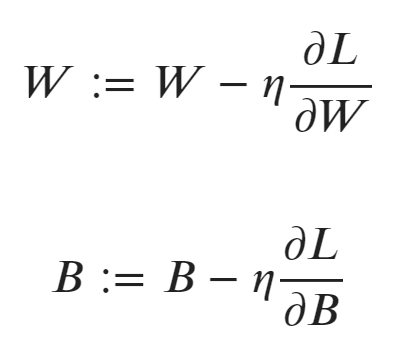

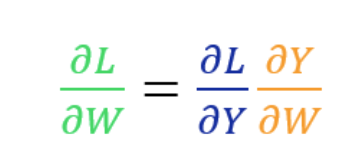

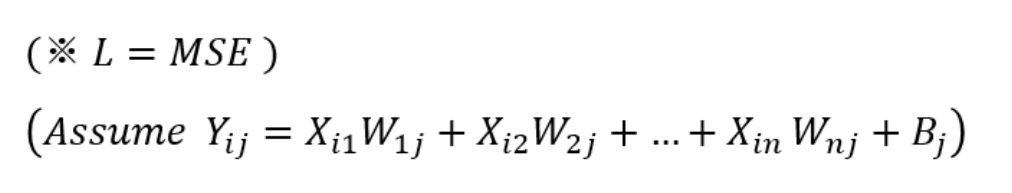

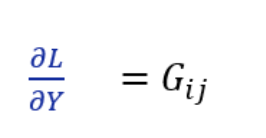

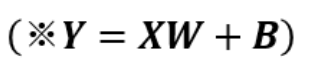

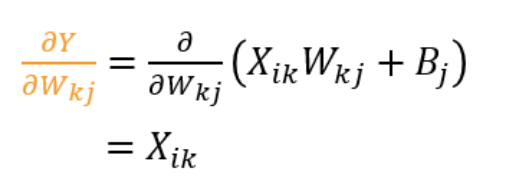

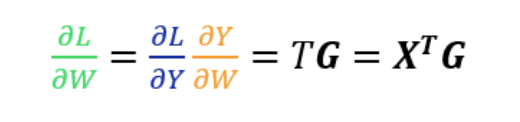

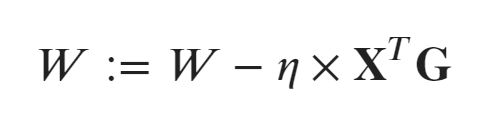

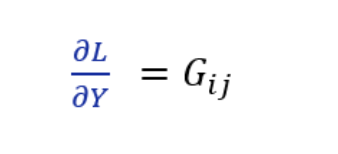

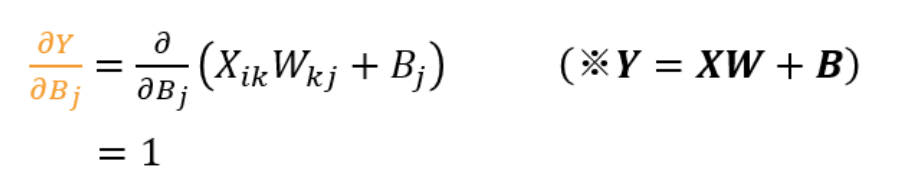

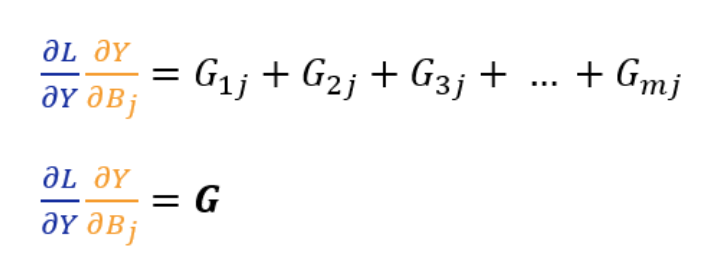

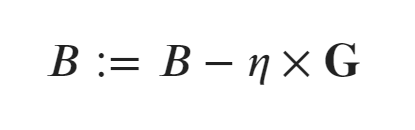

In [ ]:
# backprop_neuralnet / 역전파 / 파라미터 경사하강법 연산
def backprop_neuralnet(G_output, x):
    global weight, bias 

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)
    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w 
    bias   -= LEARNING_RATE * G_b

In [ ]:
#backprop__postproc() / 손실함수 미분

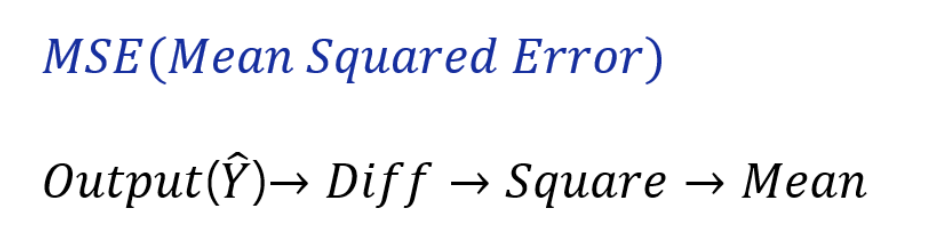

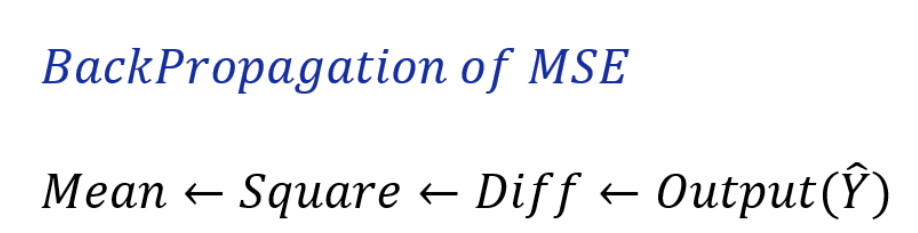

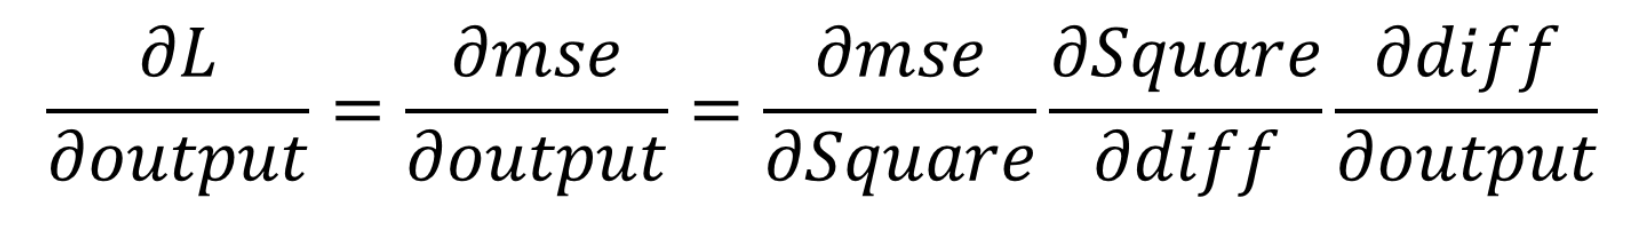

In [ ]:
diff = y_hat - train_y
print("diff.shape ;", diff.shape)

sqaure = np.square(diff)
print("sqaure : \n", sqaure)


row_count_M = diff.shape[0]
col_count_N = diff.shape[1]

print("row_count_M : ", row_count_M)
print("col_count_N : ", col_count_N)

MSE =  (sqaure[0][0] + sqaure[1][0]) / (row_count_M * col_count_N)
print("MSE : ", MSE )

diff.shape ; (2, 1)
sqaure : 
 [[ 48.49988167]
 [143.05012415]]
row_count_M :  2
col_count_N :  1
MSE :  95.77500291128767


In [ ]:
def backprop_postproc(diff):
    M_N = diff.shape

    g_mse_square  = np.ones(M_N) / np.prod(M_N)
    g_square_diff = 2 * diff 
    g_diff_output = 1

    G_diff   = g_mse_square * g_square_diff 
    G_output = g_diff_output * G_diff

    return G_output 

In [ ]:
def run_train(x, y):
    y_hat, aux_nn_x   = forward_neuralnet(x)
    loss, aux_pp_diff = forward_postproc(y_hat, y)

    accuracy = eval_accuracy(y_hat, y)

    G_output = backprop_postproc(aux_pp_diff)
    backprop_neuralnet(G_output, aux_nn_x)

    return loss, accuracy 

In [ ]:
def run_test(x,y):
    y_hat, _ = forward_neuralnet(x)
    accuracy = eval_accuracy(y_hat, y)

    return accuracy

In [ ]:
weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc = main_execute(epoch_count = 1000, 
                                                                                       mb_size = 32, 
                                                                                       report = 50, 
                                                                                       train_ratio = 0.9)

Initial Weight Value : 
[[-0.02856643]
 [ 0.01043297]
 [-0.02145649]
 [-0.01848445]
 [ 0.02015715]
 [ 0.03191691]
 [ 0.00959487]
 [ 0.00161806]
 [ 0.06983286]
 [-0.01530545]]
Initial Bias Value : 
[0.]
Epoch = 50 : Train - Loss = 5.052, Accuracy = 0.837 / Test - Accuracy = 0.825 
Epoch = 100 : Train - Loss = 5.003, Accuracy = 0.837 / Test - Accuracy = 0.826 
Epoch = 150 : Train - Loss = 4.982, Accuracy = 0.837 / Test - Accuracy = 0.832 
Epoch = 200 : Train - Loss = 4.952, Accuracy = 0.837 / Test - Accuracy = 0.835 
Epoch = 250 : Train - Loss = 4.935, Accuracy = 0.839 / Test - Accuracy = 0.821 
Epoch = 300 : Train - Loss = 4.960, Accuracy = 0.839 / Test - Accuracy = 0.815 
Epoch = 350 : Train - Loss = 4.942, Accuracy = 0.839 / Test - Accuracy = 0.817 
Epoch = 400 : Train - Loss = 4.934, Accuracy = 0.838 / Test - Accuracy = 0.827 
Epoch = 450 : Train - Loss = 4.939, Accuracy = 0.838 / Test - Accuracy = 0.839 
Epoch = 500 : Train - Loss = 4.941, Accuracy = 0.839 / Test - Accuracy = 0.822 

In [ ]:
print("weight : \n", weight)
print("bias : \n",bias)

weight : 
 [[ 4.03533819e-01]
 [ 1.04329707e-02]
 [-2.14564916e-02]
 [-1.96579234e+00]
 [ 1.17299836e+01]
 [ 2.13015256e+01]
 [ 9.08018652e+00]
 [-1.98953331e+01]
 [-1.04800251e+01]
 [ 7.94269279e+00]]
bias : 
 [2.88714263]


In [ ]:
# 예측하기
new_x = [0, 1, 0, 0.685,0.545, 0.18,1.42,0.674,0.392,0.5]

pred_Y, _ = forward_neuralnet(new_x)
print(pred_Y)

[11.12571042]


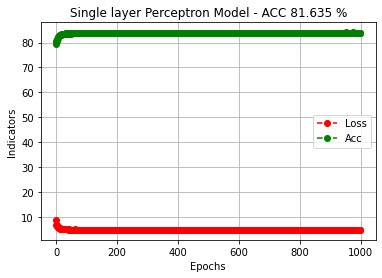

In [ ]:
# 시각화
plt.plot(losses_mean_row, '--o', color = 'red', label = 'Loss')
plt.plot(accs_mean_row, '--o', color = 'green', label = 'Acc')

plt.title("Single layer Perceptron Model - ACC {:.3f} %".\
          format(final_acc * 100))
plt.xlabel("Epochs")
plt.ylabel("Indicators")
plt.grid()
plt.legend()

plt.show()